In [1]:
from yahpo_gym.configuration import config_dict, cfg
from yahpo_gym.benchmark_set import BenchmarkSet
from yahpo_gym import local_config
import matplotlib.pyplot as plt
import pandas as pd
local_config.init_config()
local_config.set_data_path("C:\\Users\\flo\\LRZ Sync+Share\\multifidelity_data")
_lcbench_dict = {
    'config_id' : 'lcbench',
    'y_names' : ['time', 'val_accuracy', 'val_cross_entropy', 'val_balanced_accuracy', 'test_cross_entropy', 'test_balanced_accuracy'],
    'y_minimize' : [True, False, True, False, True, False],
    'cont_names': ['epoch', 'batch_size', 'learning_rate', 'momentum', 'weight_decay', 'num_layers', 'max_units', 'max_dropout'],
    'cat_names': ['OpenML_task_id'],
    'instance_names' : 'OpenML_task_id',
    'fidelity_params': ['epoch'],
    'runtime_name': 'time',
    'model': 'new_model.onnx',
} 
config_dict.update({'lcbench_noisy' : _lcbench_dict})

In [2]:
bench = BenchmarkSet("rbv2_glmnet", download = False)
bench.config_space

Configuration space object:
  Hyperparameters:
    alpha, Type: UniformFloat, Range: [0.0, 1.0], Default: 1.0
    num.impute.selected.cpo, Type: Categorical, Choices: {impute.mean, impute.median, impute.hist}, Default: impute.mean
    repl, Type: UniformInteger, Range: [1, 10], Default: 6
    s, Type: UniformFloat, Range: [0.0009118819655545162, 1096.6331584284585], Default: 1.0, on log-scale
    task_id, Type: Categorical, Choices: {1040, 1049, 1050, 1053, 1056, 1063, 1067, 1068, 11, 1111, 12, 14, 1461, 1462, 1464, 1468, 1475, 1476, 1478, 1479, 1480, 1485, 1486, 1487, 1489, 1494, 1497, 15, 1501, 1510, 1515, 1590, 16, 18, 181, 182, 188, 22, 23, 23381, 23512, 24, 28, 29, 3, 307, 31, 312, 32, 334, 37, 375, 377, 38, 40496, 40498, 40499, 40536, 40668, 40670, 40701, 40900, 40966, 40975, 40978, 40979, 40981, 40982, 40983, 40984, 40994, 41138, 41142, 41143, 41146, 41156, 41157, 41159, 41161, 41162, 41212, 41278, 4134, 4135, 4154, 42, 44, 4534, 4538, 4541, 458, 46, 469, 470, 50, 54, 60, 6332},

In [3]:
df = pd.read_csv(bench.config.get_path("dataset"))

In [4]:
def plot_true_lc(ccc):
    # Subset data to obtain learning curve for config
    config = pd.DataFrame(data = ccc, index = [0])
    config.drop(bench.config.fidelity_params, axis = 1, inplace=True)
    pdf = df.merge(config, on=list(config.columns.values))
    plt.plot(pdf[bench.config.fidelity_params[0]], pdf[bench.config.y_names[0]])

In [22]:
def plot_lc_lcbench(ccc):
    ccc["OpenML_task_id"] = str(ccc["OpenML_task_id"])
    res = []
    for j in range(5):
        out = []
        for i in range(51):
            val = ccc.copy()
            val.update({"epoch" : i+1})
            out.append(bench.objective_function(val)['val_accuracy'])
        res.append(out)
        
    colors = ['red', 'blue','orange', 'purple','green',]
    for i in range(5):
        plt.plot(range(51), res[i], color=colors[i])

def plot_lc_rbv2(ccc):
    ccc["task_id"] = str(ccc["task_id"])
    ccc['repl'] = 1
    res = []
    bench.check - False
    for j in range(5):
        out = []
        for i in range(95):
            val = ccc.copy()
            val.update({"trainsize" : i / 100. + 0.05})
            out.append(bench.objective_function(val)[bench.config.y_names[0]])
        res.append(out)
        
    colors = ['red', 'blue','orange', 'purple','green',]
    for i in range(5):
        plt.plot([x / 100 + 0.05 for x in range(95)], res[i], color=colors[i])


{'alpha': 0.773555, 'num.impute.selected.cpo': 'impute.mean', 'repl': 10, 's': 0.0537849, 'task_id': 40978, 'trainsize': 0.5}


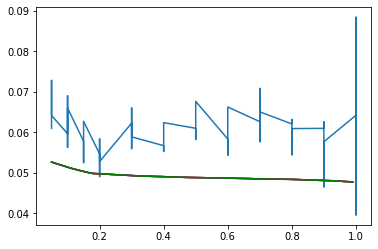

In [30]:
# Draw a sample configuration
ccc = df.sample(1).to_dict()
ccc = {k:list(ccc[k].values())[0] for k in bench.config_space.get_hyperparameter_names()}
print(ccc)
plot_true_lc(ccc)
plot_lc_rbv2(ccc)


In [20]:
bench.check

True

In [12]:
bench.config.fidelity_params

['trainsize', 'repl']

In [11]:
ccc = df.sample(1).to_dict()
ccc

{'timetrain': {371785: 2.26500000000002},
 'timepredict': {371785: 0.056999999999988},
 'trainsize': {371785: 1.0},
 'f1': {371785: nan},
 'mmce': {371785: 0.551020408163265},
 'auc': {371785: nan},
 'logloss': {371785: 1.29698742328259},
 'repl': {371785: 8},
 'learner': {371785: 'classif.glmnet'},
 'alpha': {371785: 0.177822},
 's': {371785: 473.375},
 'num.impute.selected.cpo': {371785: 'impute.mean'},
 'task_id': {371785: 40498},
 'dataset': {371785: 'wine.quality.white'}}